In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [13]:
df['owner'] = df['owner'].apply(lambda x:'Newer' if x == 'First Owner' else "Older")
df['selling_price'] =  df['selling_price']/82.41#Convert Rupees to USD
df['fuel'] = df['fuel'].apply(lambda x:'Petrol' if x == 'Petrol' else ('Diesel' if x == 'Diesel' else 'Other'))
df['Age'] = 2023 - df['year'] #Transform year column into a variable representing a car's age
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,Maruti 800 AC,2007,728.066982,70000,Petrol,Individual,Manual,Newer,16
1,Maruti Wagon R LXI Minor,2007,1638.150710,50000,Petrol,Individual,Manual,Newer,16
2,Hyundai Verna 1.6 SX,2012,7280.669822,100000,Diesel,Individual,Manual,Newer,11
3,Datsun RediGO T Option,2017,3033.612426,46000,Petrol,Individual,Manual,Newer,6
4,Honda Amaze VX i-DTEC,2014,5460.502366,141000,Diesel,Individual,Manual,Older,9
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,4975.112244,80000,Diesel,Individual,Manual,Older,9
4336,Hyundai i20 Magna 1.4 CRDi,2014,4975.112244,80000,Diesel,Individual,Manual,Older,9
4337,Maruti 800 AC BSIII,2009,1334.789467,83000,Petrol,Individual,Manual,Older,14
4338,Hyundai Creta 1.6 CRDi SX Option,2016,10496.298993,90000,Diesel,Individual,Manual,Newer,7


Let's visualize the data to help us understand the relationships between some variables. Since we are interested in classifying the owners and regression on the selling price, we'll explore plots with these variables.

<AxesSubplot:xlabel='Age', ylabel='count'>

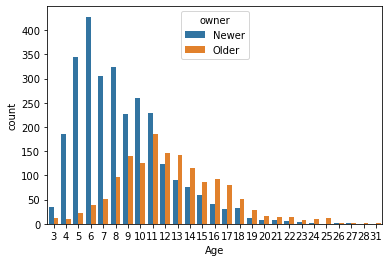

In [15]:
sns.countplot(data = df,x = 'Age',hue = 'owner')

We can see a noticeable right skew regarding the age the car was manufactured for new cars. This means that the newer cars tend to be more young. Meanwhile we can see that the used cars tend to have less young cars (3,4) and noticeably more older cars compared to the new cars and seems to be more symmetrically distributed.

I consider this plot "helpful" to see differences between new and used cars

<AxesSubplot:xlabel='transmission', ylabel='count'>

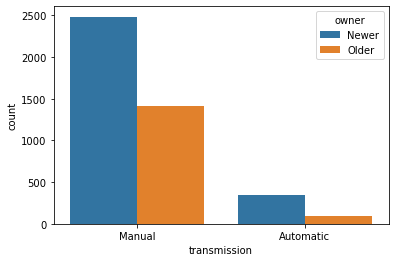

In [16]:
sns.countplot(data = df,x = 'transmission',hue = 'owner')

For both new and used cars, there seems to be an overwhelming majority of manual tranmission cars as opposed to automatic. "unhelpful"

[Text(0.5, 0, 'Seller Type')]

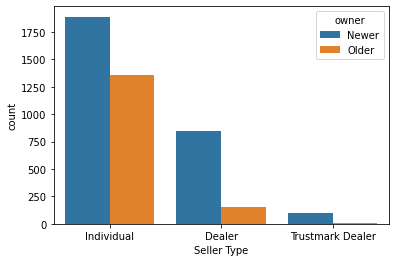

In [17]:
ax = sns.countplot(data = df,x = 'seller_type',hue = 'owner')
ax.set(xlabel = "Seller Type")

For both new and used cars, most of the cars are sold by individuals followed by a dealer and trustmark dealers selling the least amount of cars. "unhelpful"

<AxesSubplot:xlabel='fuel', ylabel='count'>

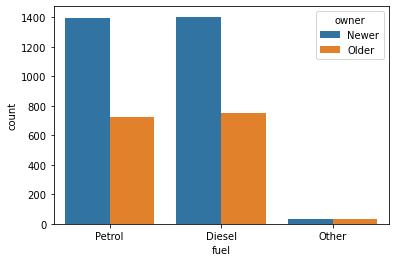

In [18]:
sns.countplot(data = df,x = 'fuel',hue = 'owner')

It seems like for both new and used cars, they have roughly the same proportion of cars that use petrol, diesel, and other types of fuels. "unhelpful"

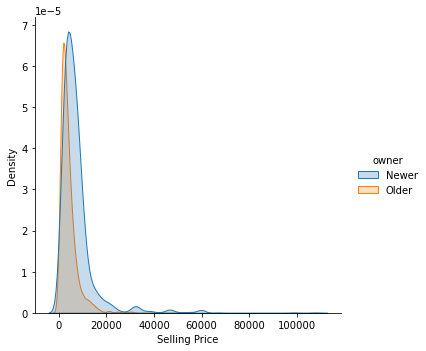

In [19]:
ax = sns.displot(data = df,x = 'selling_price', hue = 'owner', kind="kde",fill=True)
ax.set(xlabel = "Selling Price")

Based on the density plot, we can see that new cars tend to be more expensive on average compared to used cars. Notice how there's more density for higher prices. "Useful"

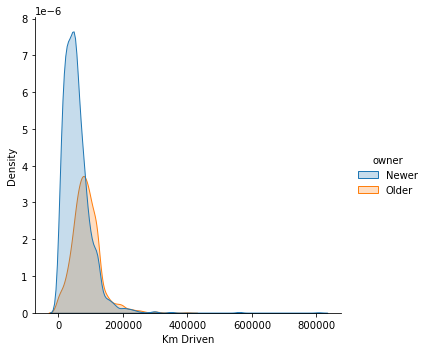

In [20]:
ax = sns.displot(data = df,x = 'km_driven', hue = 'owner', kind="kde",fill=True)
ax.set(xlabel = "Km Driven")

We can see that the newer cars on average have less mileage on them compared to the older cars. "Useful"

[Text(0, 0.5, 'Selling Price')]

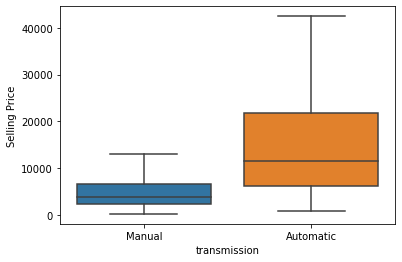

In [21]:
ax = sns.boxplot(data = df,y = 'selling_price', x = 'transmission', showfliers = False)
ax.set(ylabel = "Selling Price")

We can see that automatic cars tend to be more expensive on average (Helpful). We also see that manual cars have less spread compared to automatic cars.

In [4]:
df['Age']

0       16
1       16
2       11
3        6
4        9
        ..
4335     9
4336     9
4337    14
4338     7
4339     7
Name: Age, Length: 4340, dtype: int64

[Text(0, 0.5, 'Selling Price')]

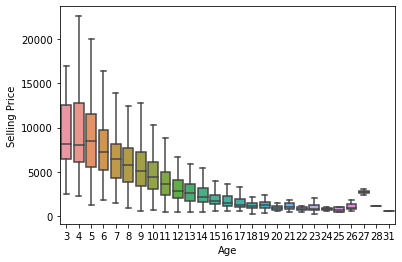

In [22]:
ax = sns.boxplot(data = df,y = 'selling_price', x = 'Age', showfliers = False)
ax.set(ylabel = "Selling Price")

We can see that there's a general trend where selling price tends to go up the more recent the car was made. Also notice that the more recent the car was made the more variation and wiggle room you have for the price. (Useful)

[Text(0, 0.5, 'Selling Price')]

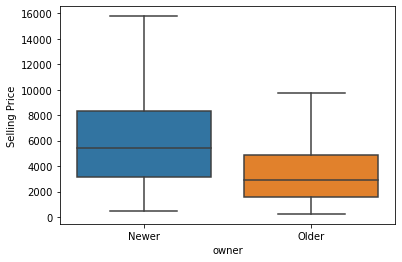

In [23]:
ax = sns.boxplot(data = df,y = 'selling_price', x = 'owner', showfliers = False)
ax.set(ylabel = "Selling Price")

We can see that selling price is more pricey for cars with less owners compared to cars with more owners on average. Cars with less owners also have more spread in price. (helpful)

[Text(0, 0.5, 'Selling Price'), Text(0.5, 0, 'Seller Type')]

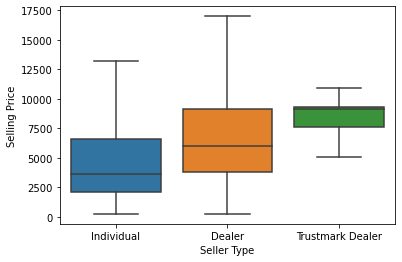

In [24]:
ax = sns.boxplot(data = df,y = 'selling_price', x = 'seller_type', showfliers = False)
ax.set(ylabel = "Selling Price",xlabel='Seller Type')

We can see that individuals tend to sell their cars at a cheaper rate on average as opposed to trustmark dealers being the most expensive and with dealers somewhat in the middle. Trustmark Dealers also have less spread compared to the other two types of sellers. (Helpful)

[Text(0, 0.5, 'Selling Price')]

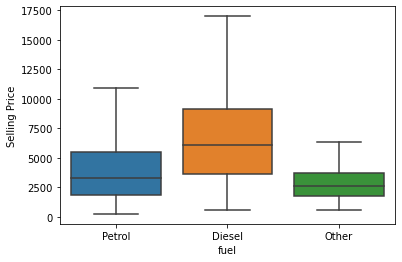

In [25]:
ax = sns.boxplot(data = df,y = 'selling_price', x = 'fuel', showfliers = False)
ax.set(ylabel = "Selling Price")

We see that diesel cars tend to be the most expensive on average but also the most spread out. Then with petrol cars and the middle in terms of price and spread and finally other being the least expensive and spread out. (Helpful)

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

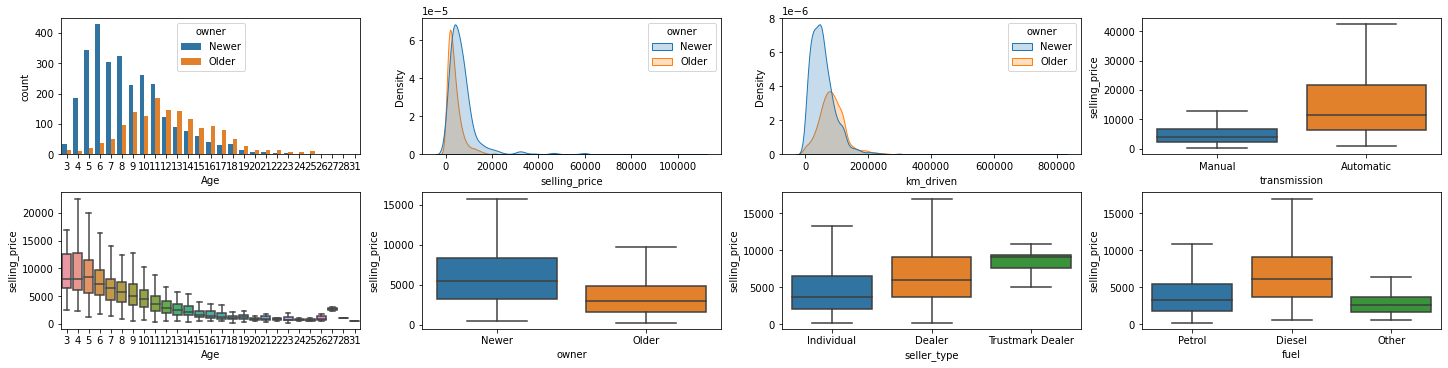

In [35]:
fig, ax = plt.subplots(nrows=2, ncols = 4, figsize=(20, 5), layout = 'constrained')
sns.countplot(data = df,x = 'Age',hue = 'owner', ax = ax[0][0])
sns.kdeplot(data = df,x = 'selling_price', hue = 'owner',fill=True, ax = ax[0][1])
sns.kdeplot(data = df,x = 'km_driven', hue = 'owner',fill=True, ax = ax[0][2])
sns.boxplot(data = df,y = 'selling_price', x = 'transmission', showfliers = False, ax = ax[0][3])
sns.boxplot(data = df,y = 'selling_price', x = 'Age', showfliers = False, ax = ax[1][0])
sns.boxplot(data = df,y = 'selling_price', x = 'owner', showfliers = False, ax = ax[1][1])
sns.boxplot(data = df,y = 'selling_price', x = 'seller_type', showfliers = False, ax = ax[1][2])
sns.boxplot(data = df,y = 'selling_price', x = 'fuel', showfliers = False, ax = ax[1][3])

Include these plots and clean up my interpretations for each of them included above.